## Import Libraries and Data

In [6]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_10-14-03-23.csv', firstRow=168, lastRow=174)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_140323_S169-174.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse Water Addition

In [7]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=86s and ended at t=506s; mass=45.34935g
This equals a volume of 45.44m; expected was 45.291mL; error is 0.329%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.00125 g/s and for 2nd derivative = 0.000234375 g/s^2


<IPython.core.display.Javascript object>


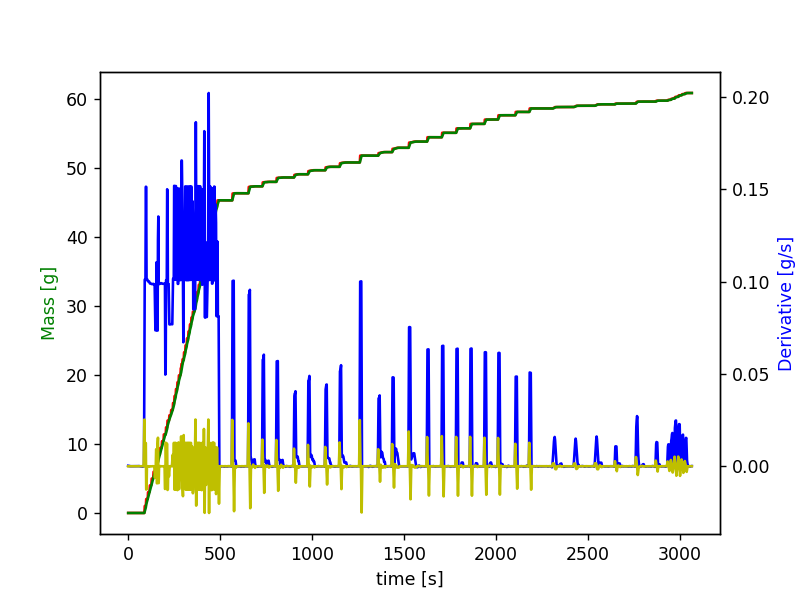

Addition of 1.033g Plantapon ACG 50 detected from 562s to 592s - expected volume = 0.996mL and actual volume = 0.923mL (resulting error is 7.336%)
Addition of 1.011g Plantapon ACG 50 detected from 650s to 696s - expected volume = 0.832mL and actual volume = 0.895mL (resulting error is 7.606%)
Addition of 0.653g Plantapon ACG 50 detected from 726s to 772s - expected volume = 0.536mL and actual volume = 0.584mL (resulting error is 9.039%)
Addition of 0.638g Plantapon ACG 50 detected from 802s to 848s - expected volume = 0.536mL and actual volume = 0.571mL (resulting error is 6.6%)
Addition of 0.47g Plantacare 818 detected from 898s to 936s - expected volume = 0.523mL and actual volume = 0.433mL (resulting error is 17.198%)
Addition of 0.583g Plantacare 818 detected from 974s to 1020s - expected volume = 0.523mL and actual volume = 0.538mL (resulting error is 2.819%)
Addition of 0.504g Plantacare 2000 detected from 1068s to 1108s - expected volume = 0.542mL and actual volume = 0.469mL (re

In [8]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.00175 g/s and for 2nd derivative = 0.000328125 g/s^2


<IPython.core.display.Javascript object>


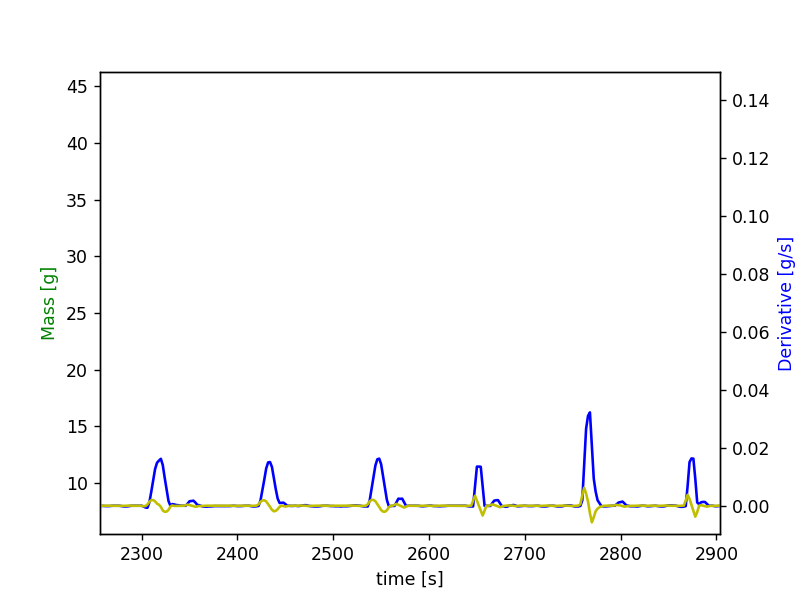

Addition of 0.208g Luviquat Excellence detected from 2304s to 2332s - expected volume = 0.218mL and actual volume = 0.191mL (resulting error is 12.553%)
Addition of 0.192g Luviquat Excellence detected from 2346s to 2448s - expected volume = 0.157mL and actual volume = 0.174mL (resulting error is 10.417%)
Addition of 0.209g Luviquat Excellence detected from 2534s to 2578s - expected volume = 0.174mL and actual volume = 0.187mL (resulting error is 7.308%)
Addition of 0.12g Luviquat Excellence detected from 2644s to 2678s - expected volume = 0.1mL and actual volume = 0.108mL (resulting error is 8.636%)
Addition of 0.285g Luviquat Excellence detected from 2756s to 2782s - expected volume = 0.265mL and actual volume = 0.26mL (resulting error is 2.062%)
Addition of 0.132g Luviquat Excellence detected from 2866s to 2884s - expected volume = 0.12mL and actual volume = 0.121mL (resulting error is 0.477%)


In [10]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=7, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.001 g/s^2


<IPython.core.display.Javascript object>


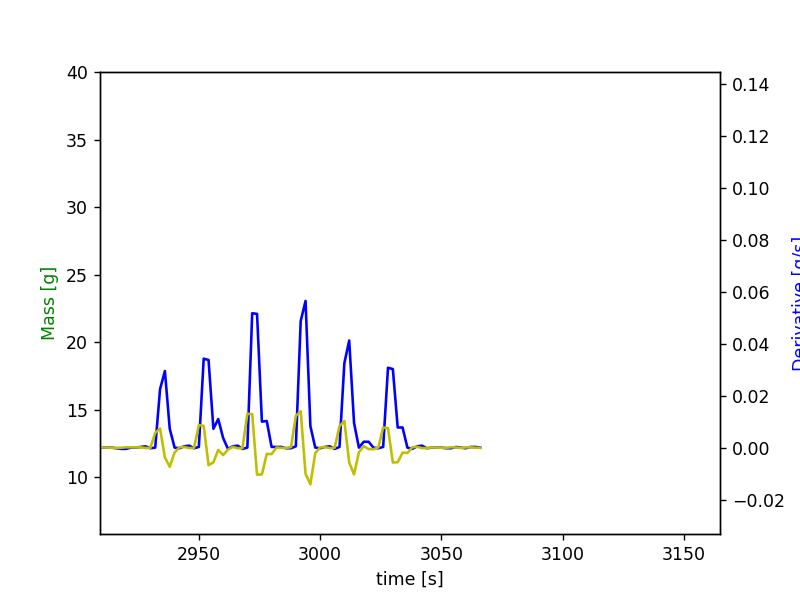

Addition of 0.119g Arlypon TT detected from 2930s to 2944s - expected volume = 0.112mL and actual volume = 0.126mL (resulting error is 12.736%)
Addition of 0.182g Arlypon TT detected from 2948s to 2964s - expected volume = 0.16mL and actual volume = 0.189mL (resulting error is 18.627%)
Addition of 0.249g Arlypon TT detected from 2968s to 2984s - expected volume = 0.23mL and actual volume = 0.256mL (resulting error is 11.659%)
Addition of 0.227g Arlypon TT detected from 2988s to 3002s - expected volume = 0.184mL and actual volume = 0.238mL (resulting error is 28.977%)
Addition of 0.176g Arlypon TT detected from 3006s to 3020s - expected volume = 0.122mL and actual volume = 0.185mL (resulting error is 51.724%)
Addition of 0.153g Arlypon TT detected from 3024s to 3040s - expected volume = 0.128mL and actual volume = 0.162mL (resulting error is 26.446%)


In [11]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [12]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_140323_S169-S174.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_27016\3679431055.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
168,169.0,0.0,10.265387,0.0,0.000000,0.000000,0.0,0.000000,11.378166,0.000000,0.0,0.0,0.000000,2.067832,0.0,0.0,0.0,0.0,1.187296
169,170.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,8.917038,12.679130,0.0,0.0,0.000000,1.900584,0.0,0.0,0.0,0.0,1.795476
170,171.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,12.890699,0.0,0.0,9.798677,2.075066,0.0,0.0,0.0,0.0,2.469255
171,172.0,0.0,9.794619,0.0,0.000000,0.000000,0.0,0.000000,0.000000,12.169923,0.0,0.0,0.000000,1.157150,0.0,0.0,0.0,0.0,2.198100
172,173.0,0.0,0.000000,0.0,10.405632,0.000000,0.0,9.872212,0.000000,0.000000,0.0,0.0,0.000000,2.815270,0.0,0.0,0.0,0.0,1.738552
173,174.0,0.0,12.504551,0.0,0.000000,10.989201,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.275307,0.0,0.0,0.0,0.0,1.482408
